In [1]:
#load libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import metrics
from scipy.stats import zscore

# calculate accuracy measures and confusion matrix
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
//anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
bank=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [345]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [346]:
#check for null's
bank.isnull().values.any()

False

In [347]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## All are set as numerical values but some are categorical Online, CD Account, Securites Account, personal loan
### Data set has 5000 rows (people) and 14 columns (attributes)


In [340]:
#Let's look at it's values to verify
bank.nunique().sort_values(ascending=True)

Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Education                3
Family                   4
Age                     45
Experience              47
CCAvg                  108
Income                 162
Mortgage               347
ZIP Code               467
ID                    5000
dtype: int64

## Yes, the first 7 rows on the above are categorical, having 4 or less unique vals.  

In [709]:
#let's remove ID gives us no info
bank=bank.drop('ID', axis=1)

In [710]:
#Let's change these that are 2 var as categories..Leaving Education and Family to check later as those would requie dummys
for i in ["Personal Loan","Securities Account", "CD Account","Online","CreditCard"]:
    cp[i] = cp[i].astype('category')
#let's make sure
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(5), float64(1), int64(8)
memory usage: 376.6 KB


- Age from 23-67 people average 45
- Family (1-4) people average of 2
### Experience is negative..is that an error? 
    -Let's look at those that have negative experience

In [371]:
#let's look at negative experience
neg=bank[bank['Experience']<0][['Age', 'Experience', 'Income','Family','CCAvg','Education', 'Mortgage','Personal Loan','CreditCard']]
print("There are", neg.shape[0], "people with negative experience")
neg.describe()

There are 52 people with negative experience


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CreditCard
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000
mean,24.519231,-1.442308,69.942308,2.865385,2.129423,2.076923,43.596154,0.0,0.288462
std,1.475159,0.639039,37.955295,0.970725,1.750562,0.836570,90.027068,0.0,0.457467
min,23.000000,-3.000000,12.000000,1.000000,0.200000,1.000000,0.000000,0.0,0.000000
25%,24.000000,-2.000000,40.750000,2.000000,1.000000,1.000000,0.000000,0.0,0.000000
50%,24.000000,-1.000000,65.500000,3.000000,1.800000,2.000000,0.000000,0.0,0.000000
75%,25.000000,-1.000000,86.750000,4.000000,2.325000,3.000000,0.000000,0.0,1.000000
max,29.000000,-1.000000,150.000000,4.000000,7.200000,3.000000,314.000000,0.0,1.000000


- 52 people with negative experience
### All are in their twenties and their lowest income recorded is 12000!
- The average income for the income for the whole data is 73 and for those with negative experience is 69 
### SO these people get around the same average income as those with negative experience but higher education average of 2.08 compare to the total avr of 1.88
- They have the same family average, even a bit higheras they (with negative experience) have 2.86 as average and the positive experience have 2.39 as the average. The Pecentiles for Mortgage are all 0.
## !!!! All of these with negative experience do not have a Personal loan and only an outlier has mortgage ( These seem to be people out of college, they might eventually say yes to Personal Loan in half a decade or so) this seems to not be usefull for our purpose but let look more into it 

//anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Personal Loan', ylabel='Age'>

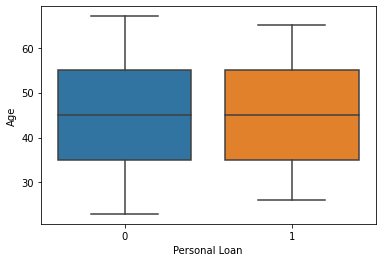

In [351]:
#let's look at the trend between age and Personal Loan since negative experince has an age range of 23-29
sns.boxplot(bank['Personal Loan'], bank['Age'])

In [378]:
# sns.boxplot(bank['Personal Loan'], bank['Experience'])

# Should I make these 0 instead of negative experience.
- Let's check those with 0 experience. Do they all have no Personal loans as well, what is their age range?

Total with Experience of 0 that have a personal loan: 7
151     26
160     29
1337    26
3084    26
3747    26
4282    26
4425    26
Name: Age, dtype: int64


//anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Personal Loan', ylabel='Age'>

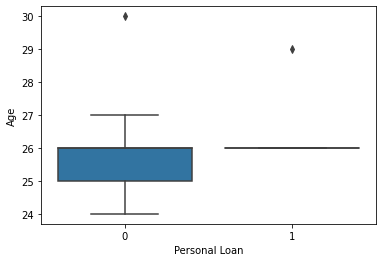

In [381]:
new=bank[bank['Experience']==0]
print("Total with Experience of 0 that have a personal loan:", new[new['Personal Loan']==1]["Age"].count())
print(new[new['Personal Loan']==1]["Age"])
sns.boxplot(new['Personal Loan'], new['Age'])

In [322]:
print("The age range is again between,", new["Age"].min() , "and", new['Age'].max( ))

The age range is again between, 24 and 30


# Those that have a personal loan with experience of 0 are the outliers of personal loan and age, which shows it's low importance
- If we are keeping Experience we can replace it with the negative experience with 0 

In [712]:
bank['Experience'].loc[(bank['Experience'] < 0)] = 0
#let's check that we no longer have any negative experience
bank[bank['Experience']<0]['Experience'].count()

0

In [389]:
#let's find the amount of entries of these categories =0
for i in ['Mortgage','CCAvg','Personal Loan']:
    print(i)
    print(bank[bank[i]==0]['Mortgage'].count())

Mortgage
3462
CCAvg
106
Personal Loan
4520


In [669]:
bank.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


- There are 3462 People with no Mortgage out of 5000 (MORE THAN HALF of all don't have mortgage)
- Only 2% of the people do not use the credit card 
- 90% of the people do NOT HAVE A PERSONAL LOAN

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


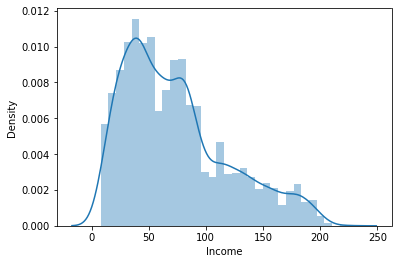

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


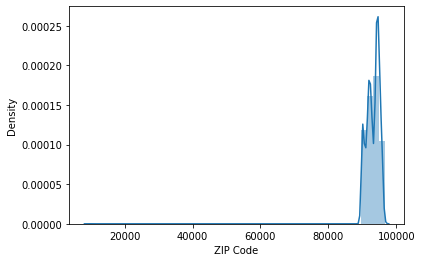

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


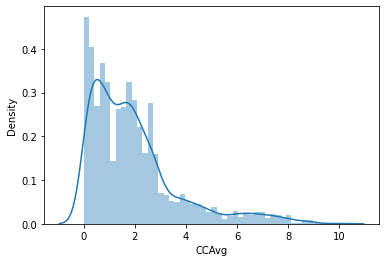

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


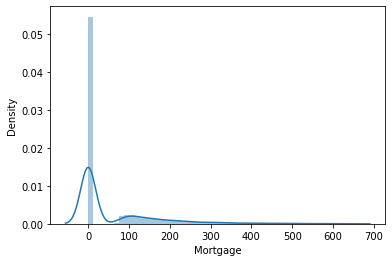

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


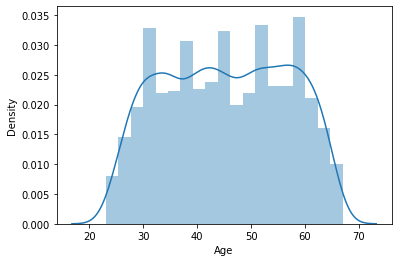

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


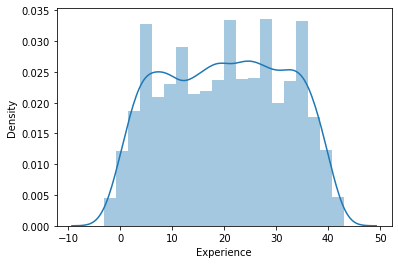

In [333]:
#Now lets see the distribution of the continuos values
for i in ['Income','ZIP Code','CCAvg','Mortgage', 'Age']:
    sns.distplot(bank[i])
    plt.show()

- Income is skew as Expected
- CCAvg is skewed (right tail) jsut like Morgage
- Thinking Mortgage can be removed due to the magnitude of skew large amount ot people do not have a loan
- age and experience are interestingly evenly distributed.

In [332]:
#let's now figure out what we will do with education and family
for i in ('Education','Family'):
    print(pd.crosstab(bank['Personal Loan'],bank[i],normalize='columns'))
    print("")


Education            1         2         3
Personal Loan                             
0              0.95563  0.870278  0.863424
1              0.04437  0.129722  0.136576

Family               1        2         3         4
Personal Loan                                      
0              0.92731  0.91821  0.868317  0.890344
1              0.07269  0.08179  0.131683  0.109656



- There is very little increase as the family and education increases and there is a good amount of distribution. We will need to make Education and Family dummies

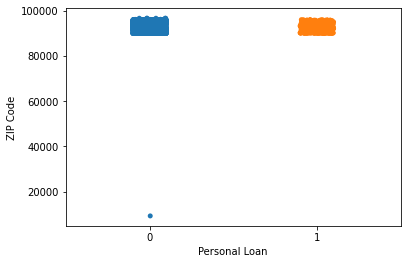

In [391]:
#Should we keep Zip Code?
sns.stripplot(bank['Personal Loan'], bank['ZIP Code'], jitter=True);

<AxesSubplot:>

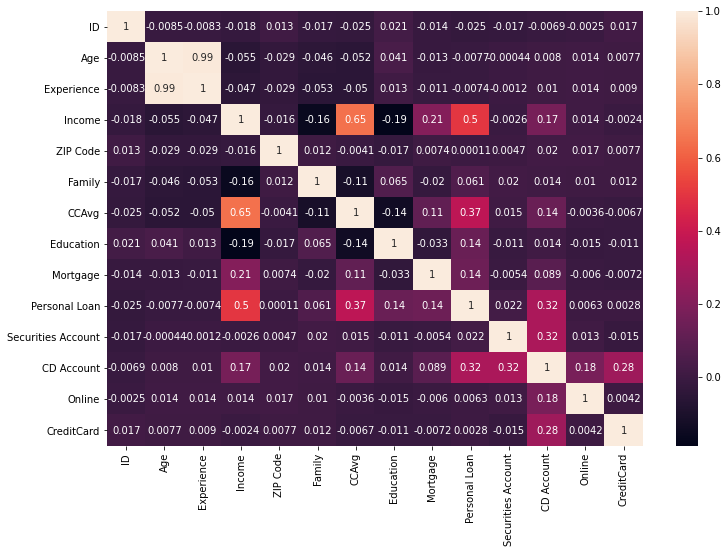

In [3]:
#let's check the correlation matrix and figure which we can remove
plt.figure(figsize=(12,8))
sns.heatmap(bank.corr(), annot=True)


- Experience and age have a high correlation .99! makes sense but neither are correlated to Personal loan so it doens't really matters
# Credit card spending and income have high correlation .65!
# Our target #Personal loan# and Income have high correlation
- Education and income have -correlation!! 
- Experience and income has - correlation!! as one increases the other decreases

## Age, Experience and ZIP code seem irrelevant in the data but for the time being lets just remove ZIP

In [713]:
#let's drop  zip code
bank=bank.drop(['ZIP Code'], axis=1)
# bank=bank.drop(['ZIP Code'], axis=1)

In [714]:
# Standardization income and Mortgage due to the vast # diffence and skewness
bank['Income']=bank[['Income']].apply(zscore)
bank['Mortgage']=bank[['Mortgage']].apply(zscore)

In [715]:
#dummy's for education and age
bank = pd.get_dummies(bank, columns=['Education', 'Family', 'Experience', 'Age'])

# Let's begin our logistic regresion

In [716]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

In [717]:
#let's begin our logistics regression
X = bank.drop('Personal Loan', axis=1)
Y = bank['Personal Loan'].astype('category')

In [718]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [719]:
#let's fit the model
#(solver="liblinear")?? should we use that one instead?
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)      

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [720]:
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)
y_predict

          0         1         2         3         4         5         6  \
0  2.549858  0.203675  0.076778 -0.479385  3.001288 -0.569042 -0.852272   

          7         8         9  ...        94        95        96        97  \
0 -3.196759  0.177797  0.345487  ...  0.032634 -0.079596 -0.406205  0.260251   

         98        99       100       101       102  intercept  
0  0.807855 -0.177422 -0.141316 -0.373153 -0.731629  -2.673475  

[1 rows x 104 columns]


array([0, 0, 0, ..., 0, 0, 0])

In [728]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False).head(10)


,Col,Coeff
7,Education_1,3.20
4,CD Account,3.00
0,Income,2.55
10,Family_1,1.55
11,Family_2,1.53
72,Age_37,1.19
66,Age_31,1.18
6,CreditCard,0.85
85,Age_50,0.84
98,Age_63,0.81


# To the Business

# The data on top shows what they found as the most efficient factors to look at that help improve the changes of the person getting the Loan . Example Undergrad (Education_1) shows to be 3.2 times likely to get a loan than for instance Age_63 which would only be .81 times. They need to focus on the people with the factors above. Use the campaine on them.

# As fo the actual prediction one can see bellow what was mentioned that in  the campain that 9% accepted the loan this time around only 7% would per my logics regression model. 

#### It would still be a gain since one can obtain a lot from a loan so it would be worth it if the money is availble to do the campain.

In [761]:
result = x_test.copy()
result['Observed Personal Loan'] = y_test
result['Predicted Personal Loan'] = y_predict
#number of predicted to get again a personal loan/ total of predicted
print('Fact')
print("People who accepted in the past:", result[result['Observed Personal Loan']==1]['Observed Personal Loan'].count())
print("Percentage that got the Personal loan", ((result[result['Observed Personal Loan']==1]['Observed Personal Loan'].count())/result.shape[0])*100)
print("")
print("Prediction")
print("People who would accepted the loan:" , result[result['Predicted Personal Loan']==1]['Predicted Personal Loan'].count())
print("Percentage that would get a personal loan :", ((result[result['Predicted Personal Loan']==1]['Predicted Personal Loan'].count())/result.shape[0])*100
)

Fact
People who accepted in the past: 138
Percentage that got the Personal loan 9.2

Prediction
People who would accepted the loan: 110
Percentage that would get a personal loan : 7.333333333333333


In [768]:
result[(result['Predicted Personal Loan']==1) & (result['Observed Personal Loan']==1)].shape

(96, 105)

In [744]:
result[result['Observed Personal Loan']==1]['Observed Personal Loan'].count()

138

In [736]:
result[result].head()

,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,...,Age_60,Age_61,Age_62,Age_63,Age_64,Age_65,Age_66,Age_67,Observed Personal Loan,Predicted Personal Loan
3406,-0.864109,2.0,-0.555524,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
757,0.156983,1.8,-0.555524,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3624,-0.081996,1.4,-0.555524,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4544,0.135258,2.5,-0.555524,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3235,-0.755483,1.6,-0.555524,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [723]:
#let's check the model scores:
trainM = model.score(x_train,y_train)
print("Model TRAINING Score:", trainM)
testM = model.score(x_test, y_test)
print("Model TESTING Score:", testM)

Model TRAINING Score: 0.9614285714285714
Model TESTING Score: 0.9626666666666667


Confusion Matrix


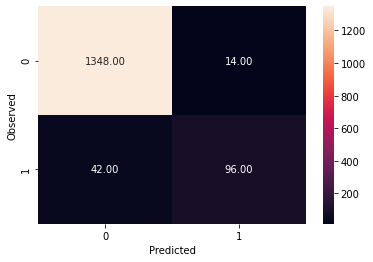

In [724]:
#let's evaluate the performance of the model
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

In [726]:
#Model Performance
print("Accuracy:",accuracy_score(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Accuracy: 0.9626666666666667

Recall: 0.6956521739130435

Precision: 0.8727272727272727

F1 Score: 0.7741935483870968

Roc Auc Score: 0.8426865862223074


# Parameters:
#### The paramentes of the Logistics Regressions does affect the model. 
#### At first I had only removed ZIP code and Age due to the the unimportance I found of these two while analysing the data. I thought the negative correlation of age wouldn't add anything to the data. It was giving low scores across all the performance metrics (using as a numerical)
##### I wanted to test without removing age since while going through the data I had seen that it was only a certain age group that tends to get person loans 35-55 (avg of 45), and that maybe the negative correlation could add to the model and it improved the scores. Instead I removed experience due to its almos no correlation at all with personal loan according to the heat map (-.0007). Yet again recall was to low .65
##### I figured that I had done quite a lot to experience and that it's data wasn't skewed so thought it could have value just like age..maybe it could predict better how 0 and negative expereince leads to the oultlier/almost no personal Loans. Doing so suprisingly improved my Precision rate. It did what I thought, it became little more selective in what it predicts to be a true Personal Loan prediction impoving mostly precision which is important because precision is better at  which are actually true possitve and calling the true negatives as such.  Having false positives would mean advertising to poeple who will actually not get personal loan (waisting money)
#### At the end I decided to do it again with age as a categorical variable creating dummies since this is not really a range and it did improved the scores. All of the model performance increased by .4 or so except Precision as it lowered it a little .2. Yet again, I decided to keep it due to the increase on the others and the fact that it still had a really good Precision. 
##### At the end I could see how modifying what should or not be in the data as well as cleaning the data is the most importart part of this . That is almost 95% of all the work and where the importance lies.  It is also very important to know what to categorize as categorical and what to keeep or remove. Removing something that has negative correlation seemed to affect my model badly and having age as categorical increased all my scores by a lot. From this I can see how age can be used and both and depending on the problem should be used as categorical. 
#### Also standarizing the mortgage and the income did help as well by a little.. the numbers had a large range. I thought I could bring it from what I had learned on linear regression. These two showed very skewed graphs. Little things like that might help the model.